```{include} ../math-definitions.md
```

In [1]:
import bccr
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Estimación de modelos ARMA


## Introducción (muy breve) al estimador de máxima verosimilitud

Sea $f(y| \theta)$ la función de densidad conjunta de la variable $Y=[Y_1, \dots, Y_n]$. Entonces, para una **muestra observada** $\mathbf{y}$ de esta distribución, la función del vector de parámetros $\theta$ definida por

```{note}
\begin{equation*}
L(\theta | \mathbf{y}) = f(\mathbf{y}|\theta)
\end{equation*}
```

se conoce como la **función de verosimilitud**.


El **estimador de máxima verosimilitud** es el valor del vector de parámetros $\theta$ que maximiza la función de verosimilitud
\begin{equation*}
\hat{\theta}_{\text{ML}} \equiv \argmax{\theta}\notationbrace{\mathcal{L}(\theta | \mathbf{y})}{$\ln L\left[(\theta | \mathbf{y})\right]$}
\end{equation*}

Es decir, $\hat{\theta}_{\text{ML}}$ es el parámetro que hace más plausible haber obtenido la muestra $\mathbf{y}$ si la verdadera distribución era $f(y|\theta)$.



{{ empieza_ejemplo }} Estimador máximo verosímil de una distribución exponencial {{ fin_titulo_ejemplo }}

Supongamos que tenemos una muestra $\left\{x_1, \dots,x_N\right\}$ de valores tomados de realizaciones independientes de una distribución exponencial con parámetro $\lambda$

La función de densidad de una observación es $f(x|\lambda) = \lambda e^{-\lambda x}$


La función de verosimilitud es la probabilidad conjunta de observar esta muestra:
\begin{align*}
L(\lambda | x_1, \dots,x_N) &= \prod_{i=1}^{N}\lambda e^{-\lambda x_i}
\end{align*}

o bien, tomando su logaritmo
\begin{align*}
\mathcal{L}(\lambda | x_1, \dots,x_N) &= \sum_{i=1}^{N}\left[\ln\lambda -\lambda x_i\right] \\
&= N\ln\lambda -\lambda \sum_{i=1}^{N}x_i
\end{align*}


Para encontrar el máximo:
\begin{align*}
\marginal{\mathcal{L}(\lambda)}{\lambda} = \frac{N}{\lambda} - \sum_{i=1}^{N}x_i = 0
\end{align*}

Por lo tanto, el estimador de máxima verosimilitud es:
\begin{equation*}
\hat{\lambda}_{\text{ML}} = \frac{N}{\sum_{i=1}^{N}x_i} = \frac{1}{\bar{x}}
\end{equation*}

donde $\bar{x}$ es el promedio simple de los datos.
{{ termina_ejemplo }}

## Estimación de modelos ARMA

Pensemos en un proceso ARMA estacionario como una distribución conjunta de $Y_1, \dots, Y_T$, donde
\begin{equation*}
\E(Y_t) = \mu \Cov(Y_t, Y_{t-j}) = \gamma_j
\end{equation*}

Entonces
\begin{align*}
\E\MAT{Y_1 \\ \vdots \\ Y_T}   &= \MAT{\mu \\ \vdots \\ \mu} = \mathbb{\mu} \\
\Var\MAT{Y_1 \\ \vdots \\ Y_T} &=\gamma_0
\MAT{1 & \rho_1 &\dots & \rho_{T-1} \\
 \rho_1 & 1 & \dots & \rho_{T-2} \\
\vdots & \vdots & \ddots & \vdots \\
 \rho_{T-1} &\rho_{T-2} & \dots & 1} = \Omega
\end{align*}


Supongamos que tenemos una serie de tiempo débilmente estacionaria, con datos generados por el proceso ARMA descrito anteriormente.
\begin{equation*}
\mathbf{y} = [y_1, y_2, \dots, y_T]'
\end{equation*}

Si asumimos que el ruido blanco $\epsilon_t$ tiene una distribución normal, entonces el proceso ARMA tiene una distribución normal multivariada

Su función de log-verosimilitud es
\begin{equation*}
\mathcal{L}(\mathbf{\theta}) = -\tfrac{T}{2}\ln(2\pi) + \tfrac{1}{2}\ln|\Omega^{-1}| - \tfrac{1}{2}(\mathbf{y}-\mathbf{\mu})'\Omega^{-1}(\mathbf{y}-\mathbf{\mu})
\end{equation*}

donde
\begin{equation*}
\mathbf{\theta} = [c, \phi_1, \dots, \phi_p, \theta_1, \dots,\theta_q]
\end{equation*}



En general, los modelos ARMA se estiman por el método de máxima verosimilitud.

Para ello, se igualan a cero las derivadas de la función $\mathcal{L}(\mathbf{\theta})$ con respecto a cada uno de los parámetros presentes en $\mathbf{\theta}$.

El resultado es un sistema de ecuaciones no lineales que carece de solución cerrada.

Por ello, es necesario recurrir a métodos numéricos para resolver estos sistemas de ecuaciones.
Por razones de tiempo, no cubrimos estos métodos en este curso. Para más detalles, consulte {cite}`Greene:2012`(cap.5) y {cite}`MirandaFackler:2002` (caps.3 y 4).



## Estimación de modelos autorregresivos

Para el modelo AR(p)
\begin{align*}
y_t & = c + \phi_1 y_{t-1} +\dots + \phi_p y_{t-p} +  \epsilon_t & \Var(\epsilon_t) &= \sigma^2
\end{align*}
es posible estimar los parámetros $c, \phi_1, \dots, \phi_p$ por mínimos cuadrados ordinarios.

* El resultado es equivalente a un estimador de máxima verosimilitud condicional.
* Se llama así porque los primeros $p$ valores de la serie se toman como dados.
* Si la muestra es grande, el resultado es equivalente al estimador de máxima verosimilitud exacto.
* El parámetro $\sigma^2$ se estima como el promedio de los cuadrados de los residuos de la regresión anterior.


{{ empieza_ejemplo }} Estimando un modelo AR(3) para la inflación mensual {{ fin_titulo_ejemplo }}

```{margin} Archivos
* bccr.ServicioWeb
* ISI-AR3.ipynb
```
Veamos la serie histórica y los autocorrelogramas de la inflación mensual subyacente de Costa Rica

/home/randall/anaconda3/envs/libro-ec4301/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


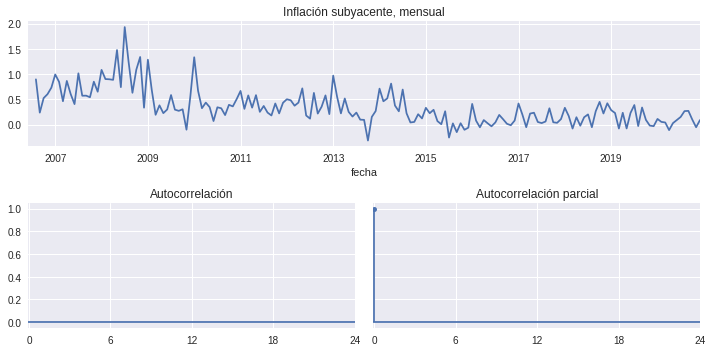

In [2]:
isi = bccr.SW(isi=25725)

fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

isi.plot(ax=ax, title='Inflación subyacente, mensual', legend=None)
plot_acf(isi, ax=axs0, title='Autocorrelación')
plot_pacf(isi, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6));

Consideremos este proceso AR(3) para modelar la inflación mensual subyacente
\begin{equation*}
y_t  = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} +  \epsilon_t
\end{equation*}

la cual estimamos con datos mensuales (2006m08 a 2020m03, indicador 25725).

In [3]:
res = ARIMA(isi, order=[3,0,0]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    isi   No. Observations:                  175
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  -4.734
Date:                Sun, 04 Apr 2021   AIC                             19.468
Time:                        22:17:36   BIC                             35.292
Sample:                    06-30-2006   HQIC                            25.886
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3406      0.116      2.939      0.003       0.113       0.568
ar.L1          0.2630      0.069      3.787      0.000       0.127       0.399
ar.L2          0.1983      0.050      3.998      0.000       0.101       0.296
ar.L3          0.3646      0.069      5.270      0.000       0.229       0.500
sigma2         0.0615      0.005     12.753      0.000       0.052       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               100.59
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo ajustado es
\begin{align*}
\tilde{y}_t &= 0.2534\tilde{y}_{t-1} + 0.1996\tilde{y}_{t-2}+0.3690\tilde{y}_{t-3}+\epsilon_t \\
\tilde{y}_t &=y_t - 0.3535 \\
 \epsilon_t&\sim\text{N}(0,0.2522^2)
\end{align*}

Las raíces inversas del polinomio\newline $1 - 0.253\Lag - 0.200\Lag^2 - 0.369\Lag^3$ están dentro del círculo unitario, por lo que el proceso es estacionario.

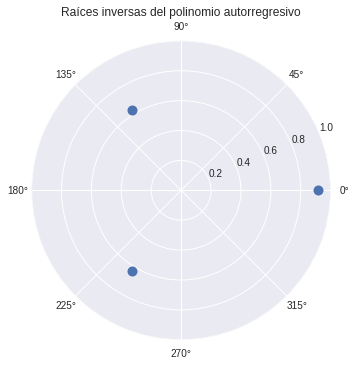

In [4]:
arroots = 1/res.arroots

plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo');

Los residuos de la regresión parecen ruido blanco, excepto por la presencia de un efecto estacional (rezago 12).

/home/randall/anaconda3/envs/libro-ec4301/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


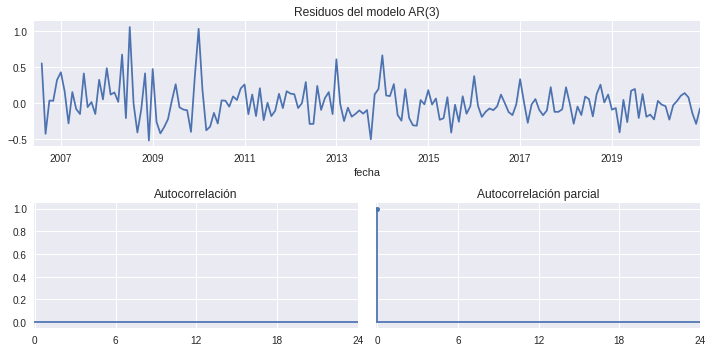

In [5]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(ax=ax, title='Residuos del modelo AR(3)', legend=None)
plot_acf(res.resid, ax=axs0, title='Autocorrelación')
plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6));

En Stata:

![](./figures/isi-AR3stata.png)
{{ termina_ejemplo }}


## Selección de modelos

En la estimación de máxima verosimilitud de un modelo ARMA(p,q) hay un supuesto implícito: que sabemos el orden del proceso, es decir, que sabemos el número “correcto” de rezagos $p, q$

En la práctica, esto rara vez sucede. Tenemos una disyuntiva: Entre más rezagos incluyamos

* “mejor” será el ajuste del modelo a los datos.
* “peor”  se vuelve la precisión de los parámetros que se estiman.

La metodología de Box-Jenkins sugiere buscar modelos **parsimoniosos**.

<!-- % Hamilton p.109 -->

La parsimonia (usar tan pocos parámetros como sea necesario) tiene sus beneficios a la hora de hacer pronósticos.

Muchos modelos estructurales complejos tienen un ajuste muy alto a la muestra en que se estiman, pero hacen pronósticos muy pobres fuera de la muestra.

Sorprendentemente, modelos ARMA univariados sencillos pueden hacer mejores pronósticos.

La idea es que entre más parámetros haya que estimar, más posibilidad hay de hacerlo mal.



## La filosofía de modelación de Box-Jenkins  
<!-- % Hamilton p.110 -->
El enfoque para pronosticar de Box-Jenkins consiste de cuatro etapas:

1. Transformar los datos (de ser necesario) para que el supuesto de estacionariedad sea razonable.
2. Adivinar valores pequeños de $p$ y $q$ para un modelo ARMA(p,q) que pueda describir la serie transformada.
3. Estimar los parámetros de $\phi(\Lag)$  y  $\theta(\Lag)$.
4. Realizar análisis de diagnóstico para confirmar que el modelo es consistente con los datos observados.


## Distinguiendo los procesos AR(p) de los MA(q)
<!-- %KWH p.69 -->




| Proceso	  |   Autocorrelación           |  Autocorrelación parcial     |
| :---------- | :-------------------------- | :--------------------------- |
|	MA(q)     | se parte en $q$             | no se parte                  |
|             | ![](./figures/ma2acf.png)   | ![](./figures/ma2pacf.png)   |
|	AR(p)     | no se parte                 | se parte en $p$              |
|             | ![](./figures/ar++acf.png)  | ![](./figures/ar++pacf.png)  |




## Criterios de selección

El autocorrelograma y el autocorrelograma parcial ayudan a reconocer series ARMA(p,0) y ARMA(0, q), pero no series ARMA(p,q) con $pq\neq 0$.

Para esto, recurrimos a **criterios de selección**.  Estos criterios tratan de resolver la disyuntiva de que a mayores valores de $p,q$, “mejor” será el ajuste pero “peor” la precisión de la estimación.

Los criterios más usuales son el de Akaike (Akaike) y el de Bayes (BIC).

Sean $\mathcal{L}$ el máximo de la función log-verosimilitud, $T$ el número de observaciones, y $K=p+q+2$ el número de parámetros estimado. Entonces


```{panels}
:header: bg-dark text-center text-white

Criterio de información de Akaike
^^^
\begin{equation*}
\text{AIC} = \notation{-2\mathcal{L}}{“desajuste”} + \notation{2K}{penalización}
\end{equation*}

---
Criterio de información de Bayes
^^^
\begin{equation*}
\text{BIC} = \notation{-2\mathcal{L}}{“desajuste”} + \notation{\ln(T)K}{penalización}
\end{equation*}
```

Se escoge la combinación $p,q$ que minimiza el criterio de información. En la práctica, en ocasiones AIC y BIC escogen modelos distintos.


{{ empieza_ejemplo }} Seleccionando p, q para un modelo ARMA de inflación {{ fin_titulo_ejemplo }}

```{margin} Archivos
* bccr.ServicioWeb
* ISI-AR3.ipynb
```
En Stata, para el modelo AR(3) que estimamos en el ejemplo anterior:

```{image} ./figures/isi-AR3stata-aic.png
```

Calculamos los criterios de información:


\begin{align*}
\text{AIC} &= -2\mathcal{L} + 2K \\
           &=-2\times -7.3195 + 2\times 5 = 24.63909\\ \\
\text{BIC} &= -2\mathcal{L} + \ln(T)K \\
           &=-2\times -7.3195 + \ln(164)\times 5 = 40.13842
\end{align*}


Si calculamos los dos criterios para una combinación de valores $p,q$ obtenemos

{badge}`AIC, badge-primary`

In [6]:
pmax = 4
qmax = 2
P = np.arange(pmax+1)
Q = np.arange(qmax+1)
plabels = [f'p={p}' for p in P]
qlabels = [f'q={q}' for q in Q]

AIC = pd.DataFrame(
        [[ARIMA(isi, order=[p,0,q]).fit().aic for q in Q ] for p in P ],
        index=plabels, columns=qlabels)

AIC.style.highlight_min(axis=None)

/home/randall/anaconda3/envs/libro-ec4301/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/home/randall/anaconda3/envs/libro-ec4301/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,q=0,q=1,q=2
p=0,131.620888,89.023411,82.401382
p=1,60.759065,25.081481,26.533141
p=2,41.690410,26.708214,28.697323
p=3,19.467588,21.346944,23.220068
p=4,21.338571,23.338547,19.543282


{badge}`BIC, badge-primary`

In [7]:
BIC = pd.DataFrame(
        [[ARIMA(isi, order=[p,0,q]).fit().bic for q in Q ] for p in P ],
        index=plabels, columns=qlabels)

BIC.style.highlight_min(axis=None)

/home/randall/anaconda3/envs/libro-ec4301/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/home/randall/anaconda3/envs/libro-ec4301/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,q=0,q=1,q=2
p=0,137.950460,98.517769,95.060526
p=1,70.253423,37.740625,42.357071
p=2,54.349554,42.532144,47.686039
p=3,35.291518,40.335660,45.373569
p=4,40.327287,45.492049,44.861569


Esto nos indica que la serie de tiempo debe modelarse como un proceso AR(3).

{{ termina_ejemplo }}